<a href="https://colab.research.google.com/github/Harshabobbiti626/Computational-Statistics-Techniques/blob/main/Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering of text Document#

Clustering is a way to group together similar documents. It helps you find and categorize large collections of documents quickly.
Clustering algorithms work by representing each document as a numerical vector. Once the documents have been transformed into vectors, the clustering algorithm can be used to group similar documents together. Here we used k-means clustering.

**Applications :**

document organization and retrieval

Information extraction and topic modeling

**Steps INvolved In the Process :**

-> Importing Libraries

-> Perform Lemmatization

-> Clustering using standard k-means

-> Standard measures of cluster quality

-> Identify the 10 most relevant terms in each cluster

-> Visualization


*Importing Libraries*

In [4]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans
import sys
from time import time
import pandas as pd
import numpy as np

In [5]:
categories = [ 'talk.religion.misc','comp.graphics','sci.space',]
print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [6]:
df = fetch_20newsgroups(subset='all', categories=categories, shuffle=False, remove=('headers', 'footers', 'quotes'))

In [7]:
labels = df.target
true_k = len(np.unique(labels)) ## This should be 3 in this example
print(true_k)

3


*Perform Lemmatization*

In [15]:
 import nltk
 nltk.download('punkt')
 nltk.download('wordnet')
 nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
lemmatizer = WordNetLemmatizer()
for i in range(len(df.data)):
    word_list= word_tokenize(df.data[i])
    lemmatized_doc = ""
    for word in word_list:
        lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
    df.data[i] = lemmatized_doc 

In [17]:
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) ## Corpus is in English
X = vectorizer.fit_transform(df.data)

In [18]:
print(X.shape)

(2588, 14439)


*Clustering using standard k-means*

In [19]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))

done in 1.859s


*Standard measures of cluster quality*

In [20]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.380
Completeness: 0.424
V-measure: 0.401
Adjusted Rand-Index: 0.354
Silhouette Coefficient: 0.008


*Identify the 10 most relevant terms in each cluster*

In [21]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: file image thanks format program know graphic ftp graphics bit
Cluster 1: wa space just like think ha time year orbit launch
Cluster 2: god jesus people wa christian bible right did say think


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


*Visualization*

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [24]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

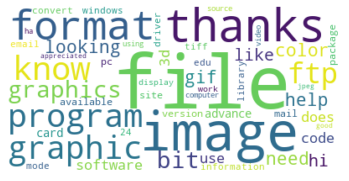

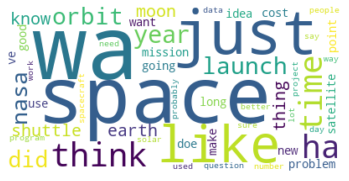

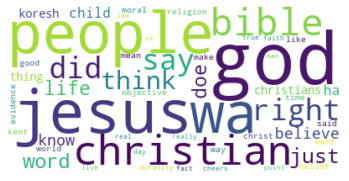

In [25]:
for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

#Clustering of image#

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# read the image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computational Statistics datasets/cluster_image.webp")

In [30]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [31]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [32]:
print(pixel_values.shape)

(336592, 3)


In [33]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [34]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [35]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [36]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

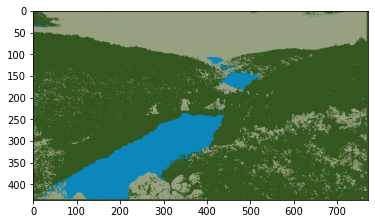

In [37]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

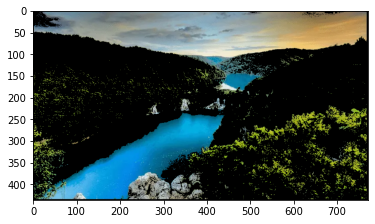

In [38]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()